In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=80, dpi_save=300)

scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.0 pandas==0.23.4 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
#fname_list = ['../../TM_datasets/Kidney-10X_P4_5', '../../TM_datasets/Kidney-10X_P4_6', '../../TM_datasets/Kidney-10X_P7_5']
import glob
fname_list = glob.glob("../../TM_datasets/*-10X_*")
anno_fname = "../Anno_TM.csv"
len(fname_list)

28

In [4]:
batch_list = [fname.split('/')[-1] for fname in fname_list]
batch_list

['Trachea-10X_P8_14',
 'Lung-10X_P8_13',
 'Tongue-10X_P4_1',
 'Tongue-10X_P7_10',
 'Liver-10X_P7_0',
 'Lung-10X_P7_9',
 'Kidney-10X_P4_5',
 'Spleen-10X_P7_6',
 'Limb_Muscle-10X_P7_14',
 'Marrow-10X_P7_3',
 'Lung-10X_P8_12',
 'Lung-10X_P7_8',
 'Bladder-10X_P4_4',
 'Thymus-10X_P7_11',
 'Trachea-10X_P8_15',
 'Tongue-10X_P4_0',
 'Bladder-10X_P4_3',
 'Liver-10X_P7_1',
 'Liver-10X_P4_2',
 'Bladder-10X_P7_7',
 'Marrow-10X_P7_2',
 'Heart_and_Aorta-10X_P7_4',
 'Kidney-10X_P4_6',
 'Mammary_Gland-10X_P7_12',
 'Spleen-10X_P4_7',
 'Mammary_Gland-10X_P7_13',
 'Limb_Muscle-10X_P7_15',
 'Kidney-10X_P7_5']

In [5]:
adata_list = [sc.read_10x_mtx(fname, var_names='gene_symbols', cache=True) for fname in fname_list]

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedu

In [6]:
adata_list[0]

AnnData object with n_obs × n_vars = 737280 × 23433 
    var: 'gene_ids'

In [7]:
adata = adata_list[0].concatenate(*adata_list[1:], join='inner', batch_key='batch', batch_categories=batch_list)
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 2990808 × 23433 
    obs: 'batch'
    var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P4_4', 'gene_ids-Thymus-10X_P7_11', 'gene_ids-Trachea-10X_P8_15', 'gene_ids-Tongue-10X_P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene_ids-Kidney-10X_P7_5'

In [8]:
obs = adata.obs
obs['CellID'] = adata.obs.index.map(lambda x: x.split('-')[-1]+'_'+x.split('-')[0])
obs.iloc[:5,:]

,batch,CellID
AAACCTGAGAAACCAT-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCAT
AAACCTGAGAAACCGC-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCGC
AAACCTGAGAAACCTA-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCTA
AAACCTGAGAAACGAG-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACGAG
AAACCTGAGAAACGCC-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACGCC


In [9]:
anno_df = pd.read_csv(anno_fname, header=0, index_col=0, sep=',')
anno_df.iloc[:5,:]

,cell_ontology_class,channel,tissue,CellID,CellType
0,myeloid cell,10X_P7_8,Lung,10X_P7_8_AAACGGGAGGATATAC,Myeloid
1,alveolar macrophage,10X_P7_8,Lung,10X_P7_8_AAACGGGTCTCGTATT,Macrophage
2,B cell,10X_P7_8,Lung,10X_P7_8_AAAGATGCAGATCTGT,B cell
3,natural killer cell,10X_P7_8,Lung,10X_P7_8_AAATGCCAGATAGTCA,NK cell
4,T cell,10X_P7_8,Lung,10X_P7_8_AAATGCCCAAACTGCT,T cell


In [10]:
# process with annotation
obs_anno = obs.merge(anno_df, how='left', on='CellID', sort=False)
obs_anno.index = obs.index
obs_anno.iloc[:5,:]

,batch,CellID,cell_ontology_class,channel,tissue,CellType
AAACCTGAGAAACCAT-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCAT,NaN,NaN,NaN,NaN
AAACCTGAGAAACCGC-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCGC,NaN,NaN,NaN,NaN
AAACCTGAGAAACCTA-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACCTA,NaN,NaN,NaN,NaN
AAACCTGAGAAACGAG-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACGAG,NaN,NaN,NaN,NaN
AAACCTGAGAAACGCC-1-Trachea-10X_P8_14,Trachea-10X_P8_14,10X_P8_14_AAACCTGAGAAACGCC,NaN,NaN,NaN,NaN


In [11]:
obs_anno['CellType'] = obs_anno['CellType'].fillna("Other")
obs_anno['CellType'].isna()

AAACCTGAGAAACCAT-1-Trachea-10X_P8_14    False
AAACCTGAGAAACCGC-1-Trachea-10X_P8_14    False
AAACCTGAGAAACCTA-1-Trachea-10X_P8_14    False
AAACCTGAGAAACGAG-1-Trachea-10X_P8_14    False
AAACCTGAGAAACGCC-1-Trachea-10X_P8_14    False
AAACCTGAGAAAGTGG-1-Trachea-10X_P8_14    False
AAACCTGAGAACAACT-1-Trachea-10X_P8_14    False
AAACCTGAGAACAATC-1-Trachea-10X_P8_14    False
AAACCTGAGAACTCGG-1-Trachea-10X_P8_14    False
AAACCTGAGAACTGTA-1-Trachea-10X_P8_14    False
AAACCTGAGAAGAAGC-1-Trachea-10X_P8_14    False
AAACCTGAGAAGATTC-1-Trachea-10X_P8_14    False
AAACCTGAGAAGCCCA-1-Trachea-10X_P8_14    False
AAACCTGAGAAGGACA-1-Trachea-10X_P8_14    False
AAACCTGAGAAGGCCT-1-Trachea-10X_P8_14    False
AAACCTGAGAAGGGTA-1-Trachea-10X_P8_14    False
AAACCTGAGAAGGTGA-1-Trachea-10X_P8_14    False
AAACCTGAGAAGGTTT-1-Trachea-10X_P8_14    False
AAACCTGAGAATAGGG-1-Trachea-10X_P8_14    False
AAACCTGAGAATCTCC-1-Trachea-10X_P8_14    False
AAACCTGAGAATGTGT-1-Trachea-10X_P8_14    False
AAACCTGAGAATGTTG-1-Trachea-10X_P8_

In [12]:
adata.obs = obs_anno
adata

AnnData object with n_obs × n_vars = 2990808 × 23433 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType'
    var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P4_4', 'gene_ids-Thymus-10X_P7_11', 'gene_ids-Trachea-10X_P8_15', 'gene_ids-Tongue-10X_P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene_ids-Kidney-10X_P7_5'

filtered out 1813031 cells that have less than 1 counts


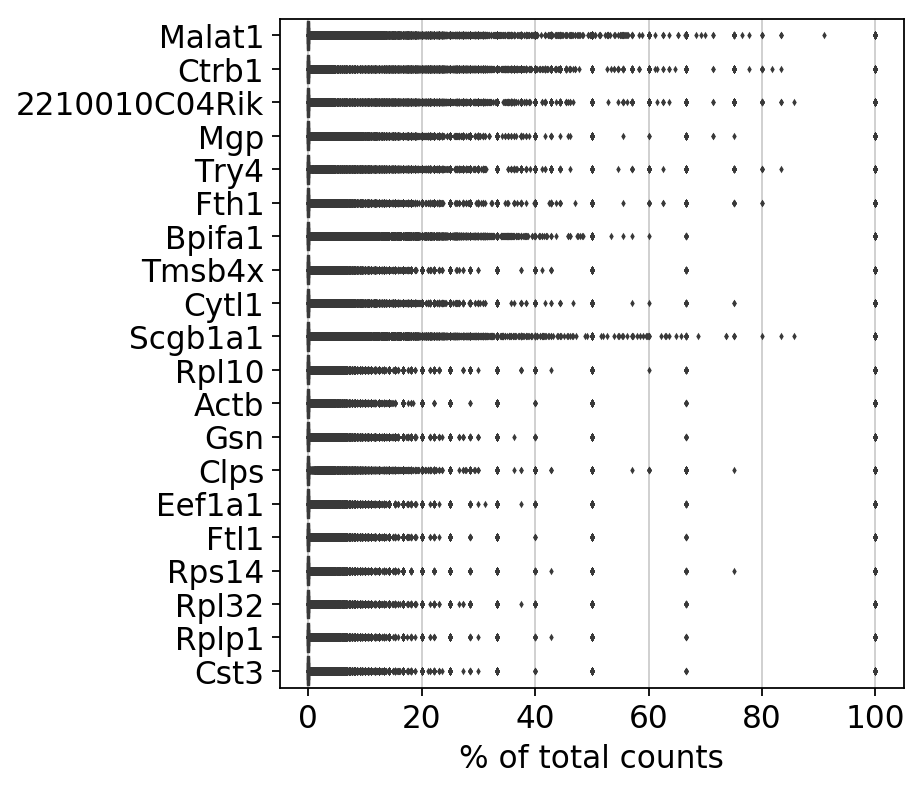

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2931338 cells that have less than 200 genes expressed
filtered out 4425 genes that are detected in less than 3 cells


In [15]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'cell_ontology_class' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'CellType' as categorical


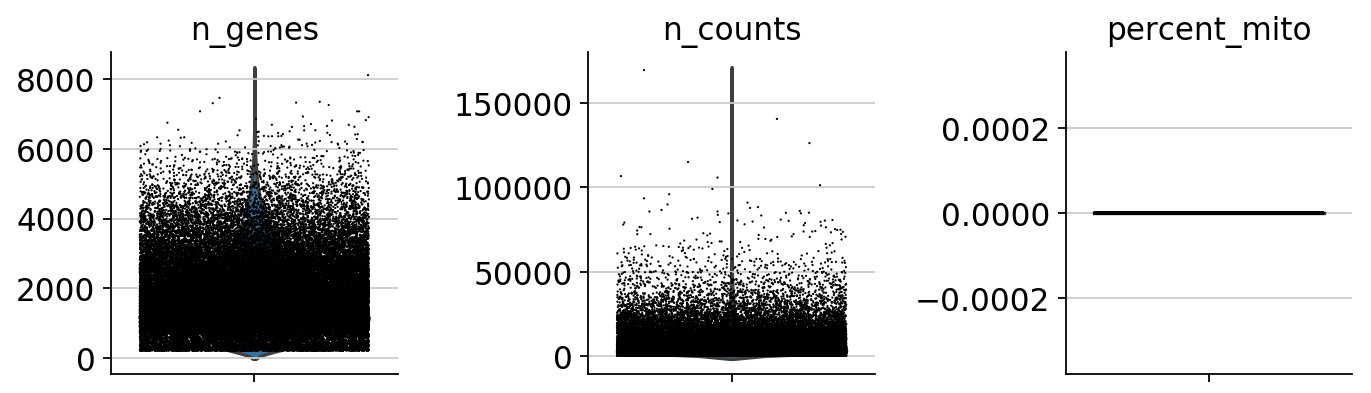

In [16]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

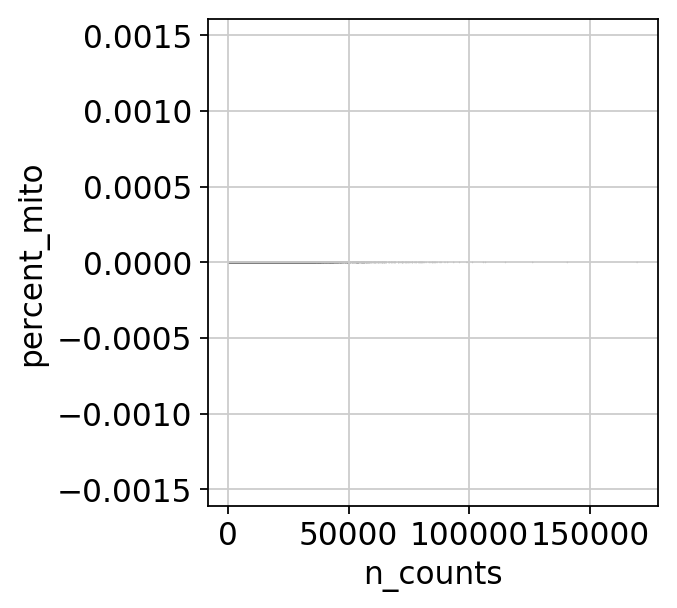

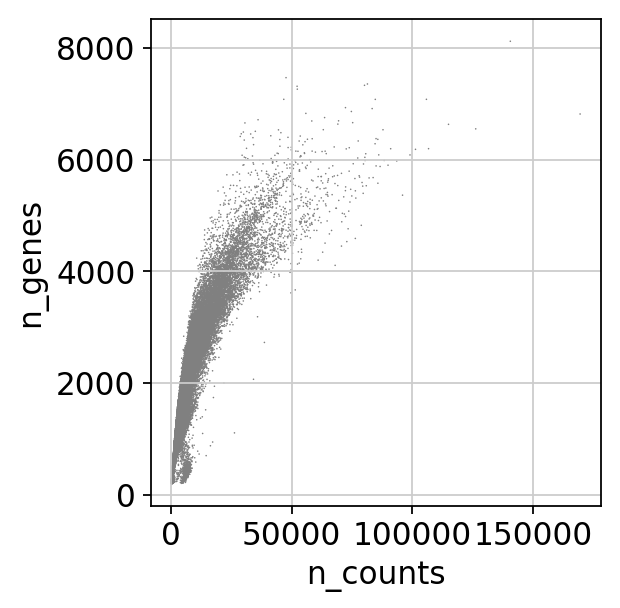

In [17]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [18]:
adata = adata[adata.obs.n_genes < 2500, :]
adata = adata[adata.obs.percent_mito < 0.05, :]

In [19]:
adata

View of AnnData object with n_obs × n_vars = 45995 × 19008 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P4_4', 'gene_ids-Thymus-10X_P7_11', 'gene_ids-Trachea-10X_P8_15', 'gene_ids-Tongue-10X_P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene_ids-Kidney

In [20]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [21]:
sc.pp.log1p(adata)

In [22]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


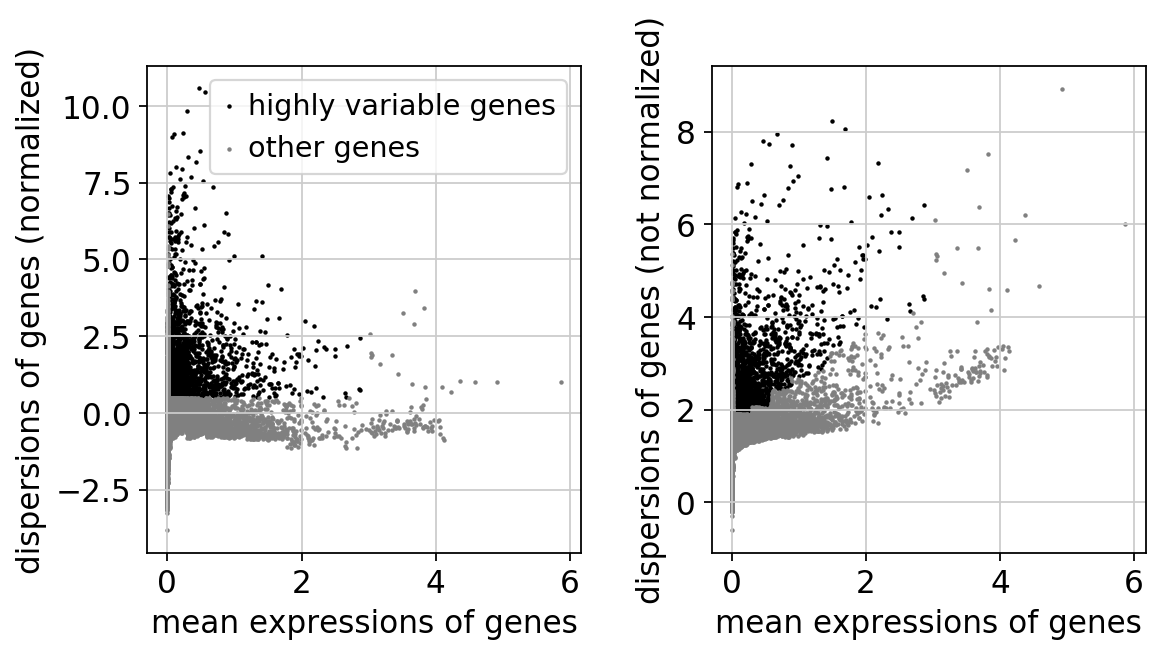

In [23]:
sc.pl.highly_variable_genes(adata)

In [24]:
adata = adata[:, adata.var.highly_variable]

In [25]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:02:14.10)


In [26]:
adata

AnnData object with n_obs × n_vars = 45995 × 2297 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P4_4', 'gene_ids-Thymus-10X_P7_11', 'gene_ids-Trachea-10X_P8_15', 'gene_ids-Tongue-10X_P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene_ids-Kidney-10X_P7_5

In [27]:
adata_base = adata.copy()

In [28]:
sc.pp.scale(adata_base, max_value=10)

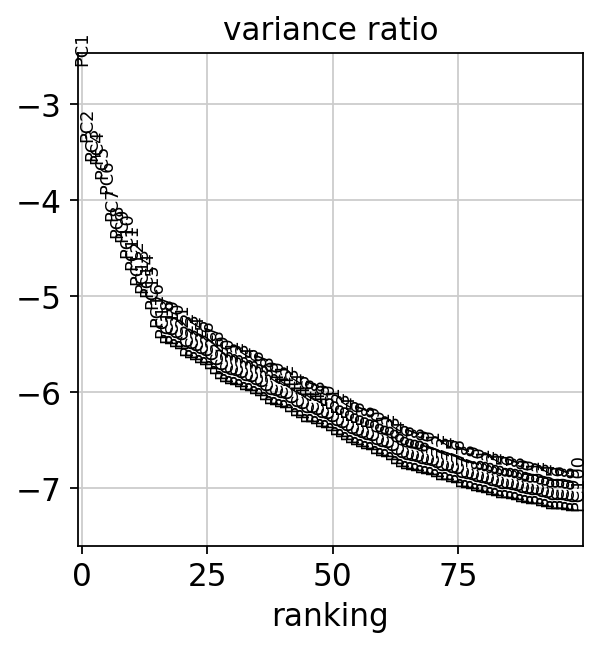

In [29]:
## PCA
sc.tl.pca(adata_base, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_base, log=True, show=100, n_pcs=100)

In [30]:
#nPC=45
sc.pp.neighbors(adata_base, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:06:55.66) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [31]:
#run tSNE
sc.tl.tsne(adata_base, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:02:54.02) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_Baseline.pdf


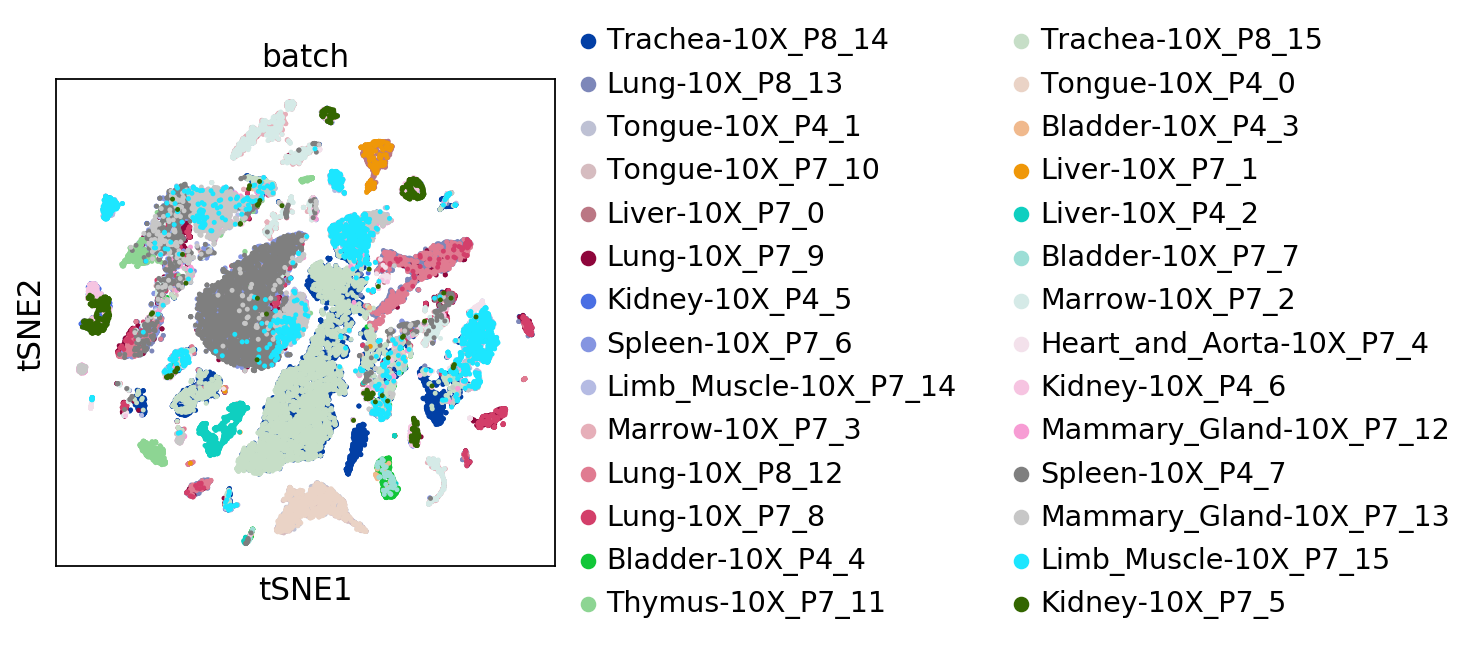

saving figure to file ./figures/tsne_CellType_Baseline.pdf


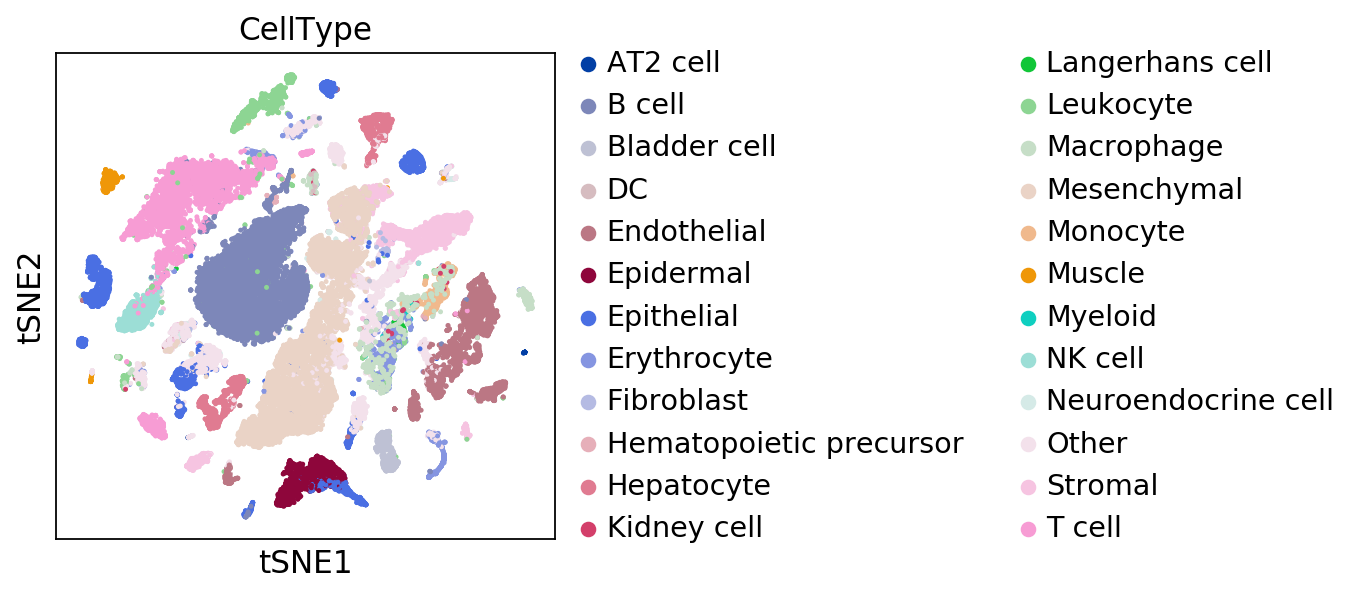

saving figure to file ./figures/tsne_CellType_Baseline_ondata.pdf


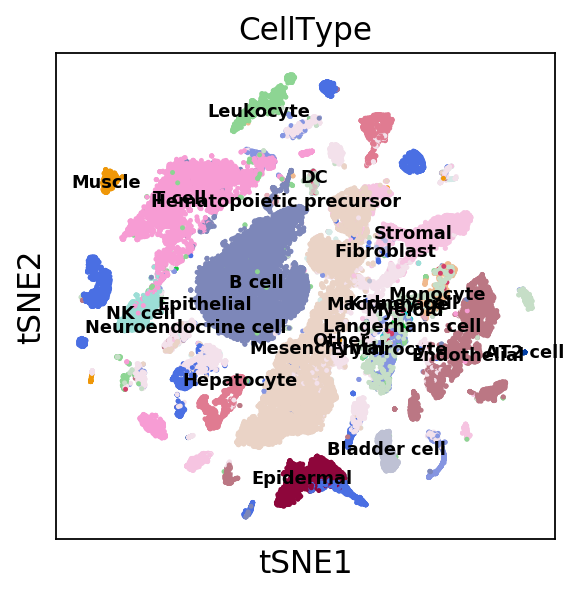

In [11]:
sc.pl.tsne(adata_base, color=['batch'], size=20, save="_Batch_Baseline.pdf")
sc.pl.tsne(adata_base, color=['CellType'], size=20, save="_CellType_Baseline.pdf")
sc.pl.tsne(adata_base, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Baseline_ondata.pdf")

In [86]:
#res=0.6
sc.tl.louvain(adata_base, resolution=0.6)
sc.pl.tsne(adata_base, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_baseline.pdf')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:08.22) --> found 39 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_baseline.pdf


In [88]:
adata_base.obs.to_csv("./cluster_Baseline.txt", index=False)

In [5]:
adata_base=sc.read("./adata_base.h5ad")

In [35]:
adata_reg = adata.copy()

In [36]:
%%time
sc.pp.regress_out(adata_reg, ['batch'])

regressing out ['batch']
    finished (0:02:31.70)
CPU times: user 36min 1s, sys: 37min 11s, total: 1h 13min 12s
Wall time: 2min 31s


In [37]:
## scale the data
sc.pp.scale(adata_reg, max_value=10)

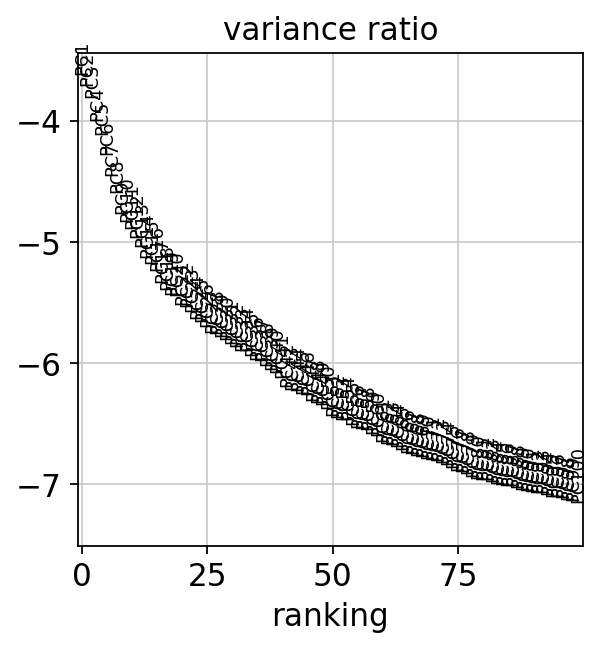

In [38]:
## PCA
sc.tl.pca(adata_reg,  n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_reg, log=True, show=100, n_pcs=100)

In [39]:
#nPC=45
sc.pp.neighbors(adata_reg, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:12.34) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [40]:
#run tSNE
sc.tl.tsne(adata_reg, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:02:56.97) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [85]:
sc.pl.tsne(adata_reg, color=['batch'], size=20, save="_Batch_reg.pdf")
sc.pl.tsne(adata_reg, color=['CellType'], size=20, save="_CellType_reg.pdf")
sc.pl.tsne(adata_reg, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_reg_ondata.pdf")

saving figure to file ./figures/tsne_Batch_reg.pdf
saving figure to file ./figures/tsne_CellType_reg.pdf
saving figure to file ./figures/tsne_CellType_reg_ondata.pdf


In [84]:
#res=0.6
sc.tl.louvain(adata_reg, resolution=0.6)
sc.pl.tsne(adata_reg, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_reg.pdf')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:05.93) --> found 55 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_reg.pdf


In [89]:
adata_reg.obs.to_csv("./cluster_reg.txt", index=False)

In [44]:
adata_combat = adata.copy()

In [45]:
%%time
sc.pp.combat(adata_combat, key='batch')

Standardizing Data across genes.
found 28 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting data
CPU times: user 2min 14s, sys: 1min 31s, total: 3min 46s
Wall time: 18.5 s


In [46]:
## scale the data
sc.pp.scale(adata_combat, max_value=10)

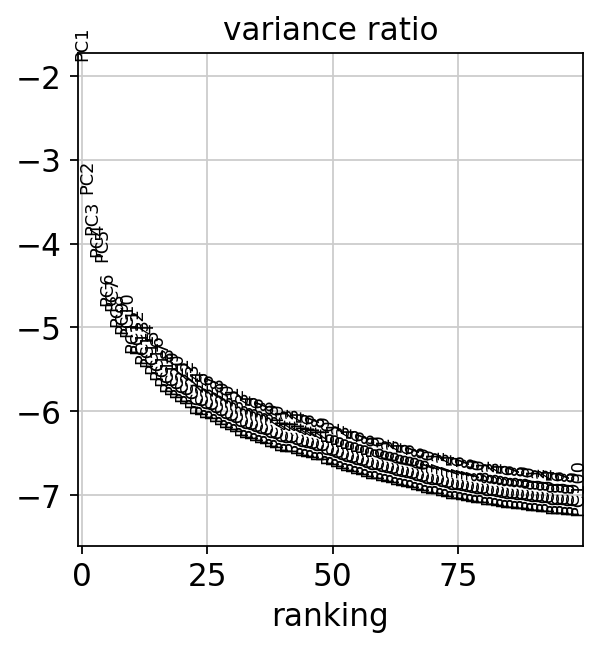

In [47]:
## PCA
sc.tl.pca(adata_combat,  n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_combat, log=True, show=100, n_pcs=100)

In [48]:
#nPC=45
sc.pp.neighbors(adata_combat, n_neighbors=15, n_pcs=45)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:13.38) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [49]:
#run tSNE
sc.tl.tsne(adata_combat, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:03:06.15) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [83]:
sc.pl.tsne(adata_combat, color=['batch'], size=20, save="_Batch_Combat.pdf")
sc.pl.tsne(adata_combat, color=['CellType'], size=20, save="_CellType_Combat.pdf")
sc.pl.tsne(adata_combat, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Combat_ondata.pdf")

saving figure to file ./figures/tsne_Batch_Combat.pdf
saving figure to file ./figures/tsne_CellType_Combat.pdf
saving figure to file ./figures/tsne_CellType_Combat_ondata.pdf


In [82]:
#res=0.6
sc.tl.louvain(adata_combat, resolution=0.6)
sc.pl.tsne(adata_combat, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_Combat.pdf')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:08.78) --> found 48 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_Combat.pdf


In [90]:
adata_combat.obs.to_csv("./cluster_Combat.txt", index=False)

In [53]:
import scanorama

In [54]:
adata_scanorama = adata.copy()

In [55]:
adata_list = [adata_scanorama[adata_scanorama.obs['batch'] == i] for i in adata_scanorama.obs['batch'].unique()]

In [56]:
#check
print(adata_list[0].shape)
print(adata_list[0])

(8133, 2297)
View of AnnData object with n_obs × n_vars = 8133 × 2297 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P4_4', 'gene_ids-Thymus-10X_P7_11', 'gene_ids-Trachea-10X_P8_15', 'gene_ids-Tongue-10X_P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene

In [57]:
%%time
intergrated, corrected = scanorama.correct_scanpy(adata_list, return_dimred=True)

Found 2297 genes among all datasets
[[0.         0.1226246  0.01584786 0.02604167 0.         0.11819596
  0.13989637 0.01827102 0.36003861 0.01678979 0.10280374 0.02813853
  0.06966618 0.00521921 0.90354812 0.00655431 0.         0.
  0.         0.29787234 0.00152788 0.1598916  0.04407713 0.17482014
  0.00506103 0.06930693 0.17225106 0.03229665]
 [0.         0.         0.00158479 0.         0.         0.32192846
  0.02849741 0.14234493 0.01399614 0.09603761 0.88785047 0.29004329
  0.00580552 0.00208768 0.02223019 0.         0.         0.00727273
  0.         0.         0.02979374 0.11924119 0.01652893 0.01079137
  0.07780567 0.00801509 0.01085418 0.00358852]
 [0.         0.         0.         0.83854167 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00158479 0.98732171 0.         0.
  0.         0.         0.         0.         0.         0.00158479
  0.         0.00282885 0.00158479 0.        ]
 [0.         0.         0.         0.  

In [58]:
corrected_merged_dge = corrected[0].concatenate(*corrected[1:])
corrected_merged_dge.obs = adata_scanorama.obs

In [59]:
## scale the data
sc.pp.scale(corrected_merged_dge, max_value=10)

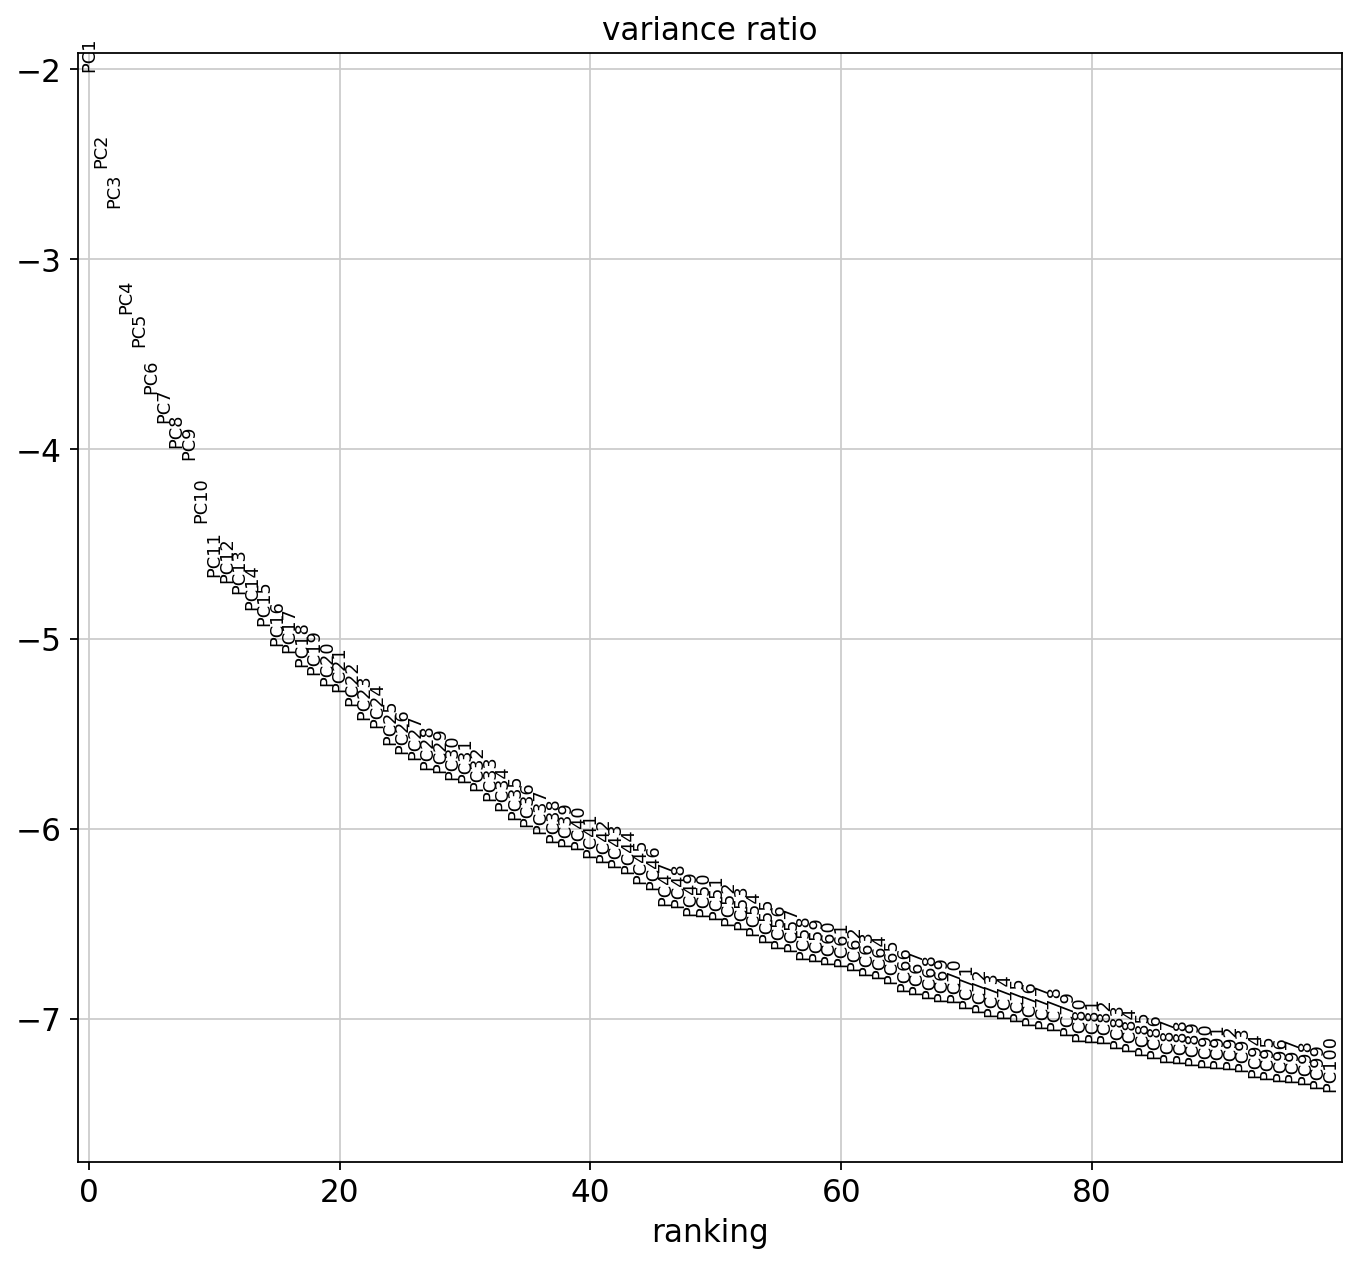

In [60]:
## PCA
sc.tl.pca(corrected_merged_dge, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(corrected_merged_dge, log=True, show=100, n_pcs=100)

In [61]:
#nPC=45
sc.pp.neighbors(corrected_merged_dge, n_neighbors=15, n_pcs=45)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:13.88) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [5]:
#run tSNE
sc.tl.tsne(corrected_merged_dge, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:03:01.63) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_Scanorama.pdf


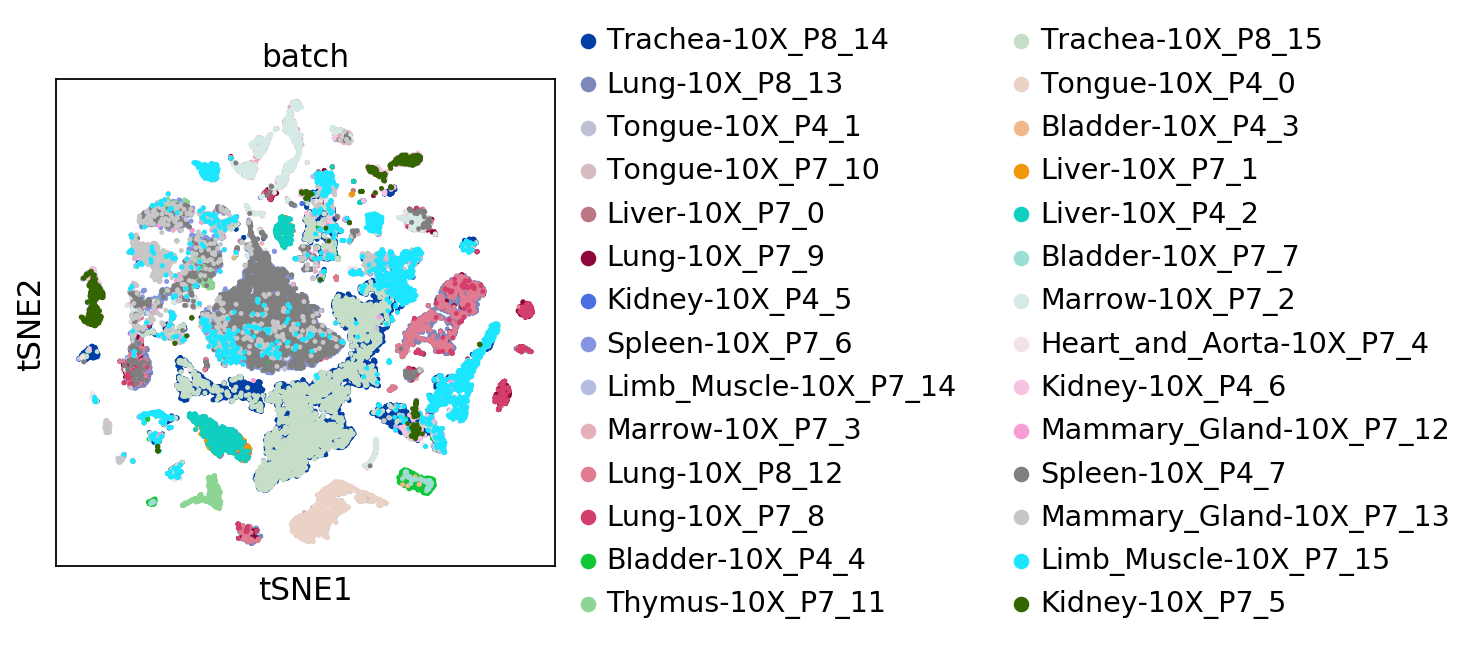

saving figure to file ./figures/tsne_CellType_Scanorama.pdf


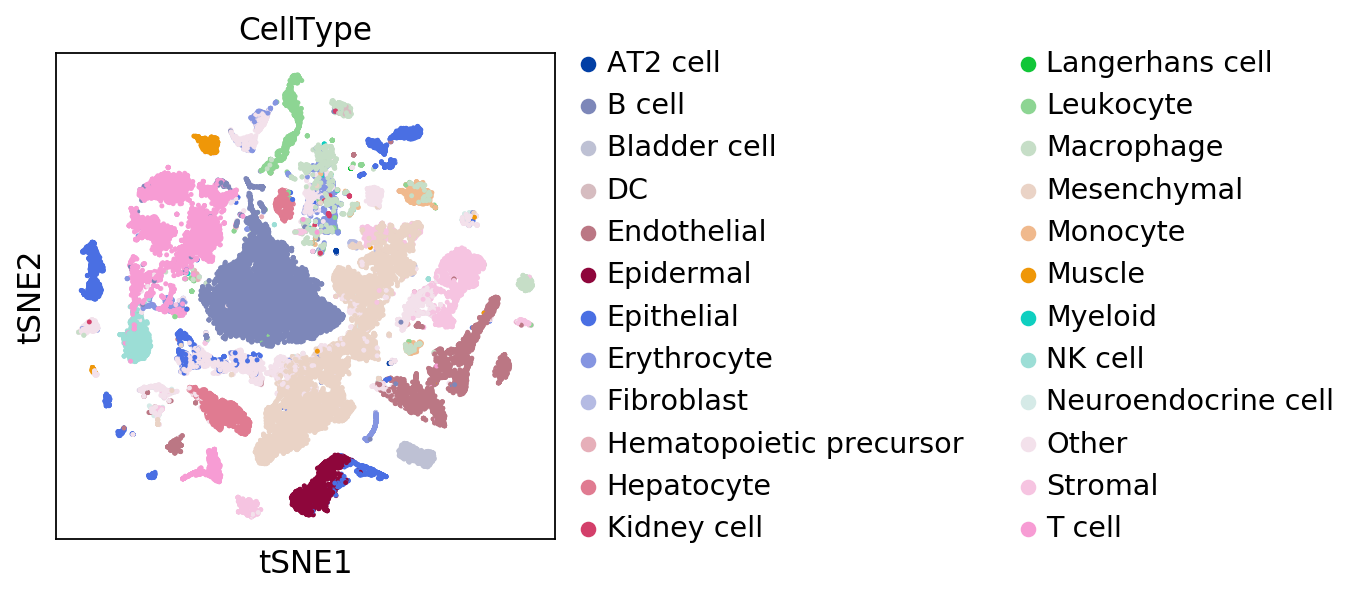

saving figure to file ./figures/tsne_CellType_Scanoram_ondata.pdf


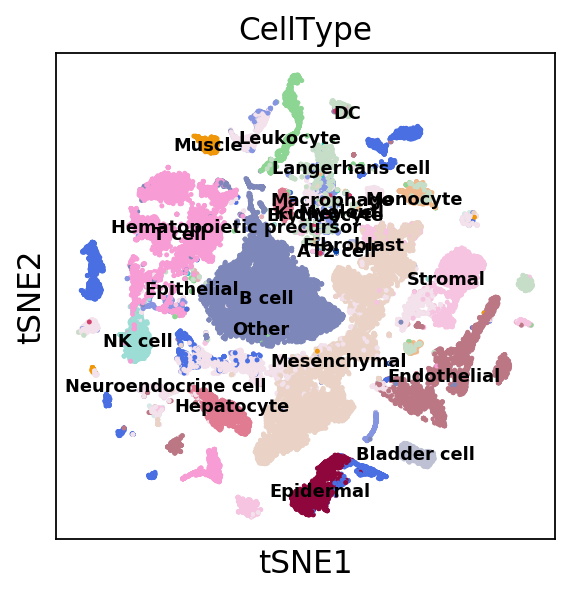

In [15]:
sc.pl.tsne(corrected_merged_dge, color=['batch'], size=20, save="_Batch_Scanorama.pdf")
sc.pl.tsne(corrected_merged_dge, color=['CellType'], size=20, save="_CellType_Scanorama.pdf")
sc.pl.tsne(corrected_merged_dge, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Scanoram_ondata.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:21.70) --> found 45 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_Scanorama.pdf


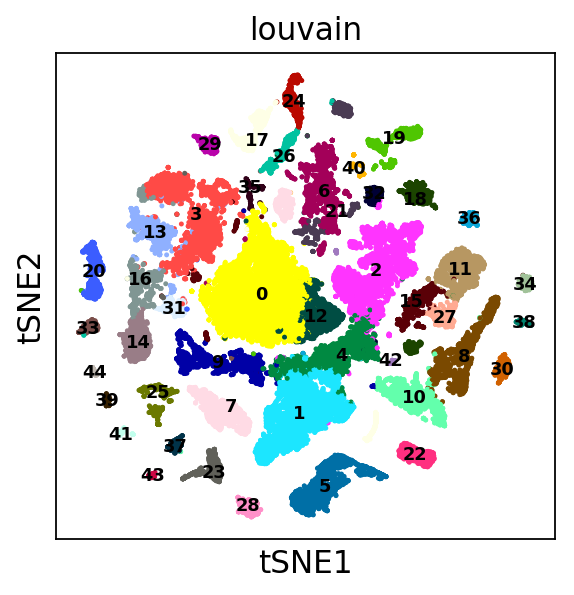

In [4]:
#res=0.6
sc.tl.louvain(corrected_merged_dge, resolution=0.6)
sc.pl.tsne(corrected_merged_dge, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_Scanorama.pdf')

In [91]:
corrected_merged_dge.obs.to_csv("./cluster_Scanorama.txt", index=False)

In [3]:
#corrected_merged_dge=sc.read("adata_scanorama.h5ad")

In [13]:
corrected_merged_dge

AnnData object with n_obs × n_vars = 45995 × 2297 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    uns: 'CellType_colors', 'batch_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [6]:
#adata=sc.read("adata.h5ad")

In [7]:
adata_mnn = adata.copy()

In [10]:
#adata_list = [adata_mnn[adata_mnn.obs['batch'] == i] for i in adata_mnn.obs['batch'].unique()]
#adata_list

P4_0', 'gene_ids-Bladder-10X_P4_3', 'gene_ids-Liver-10X_P7_1', 'gene_ids-Liver-10X_P4_2', 'gene_ids-Bladder-10X_P7_7', 'gene_ids-Marrow-10X_P7_2', 'gene_ids-Heart_and_Aorta-10X_P7_4', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Mammary_Gland-10X_P7_12', 'gene_ids-Spleen-10X_P4_7', 'gene_ids-Mammary_Gland-10X_P7_13', 'gene_ids-Limb_Muscle-10X_P7_15', 'gene_ids-Kidney-10X_P7_5', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm',
 View of AnnData object with n_obs × n_vars = 963 × 2297 
     obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
     var: 'gene_ids-Trachea-10X_P8_14', 'gene_ids-Lung-10X_P8_13', 'gene_ids-Tongue-10X_P4_1', 'gene_ids-Tongue-10X_P7_10', 'gene_ids-Liver-10X_P7_0', 'gene_ids-Lung-10X_P7_9', 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Spleen-10X_P7_6', 'gene_ids-Limb_Muscle-10X_P7_14', 'gene_ids-Marrow-10X_P7_3', 'gene_ids-Lung-10X_P8_12', 'gene_ids-Lung-10X_P7_8', 'gene_ids-Bladder-10X_P

In [11]:
%%time
adata_mnn, _, _ = sc.external.pp.mnn_correct(*adata_list)

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 27: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 27: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 27: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 27: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 27: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 6 of 27: processing batch 6
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 7 of 27: processing batch 7
  Looking for MNNs...
  Computing correction vectors.

In [12]:
## scale the data
sc.pp.scale(adata_mnn, max_value=10)

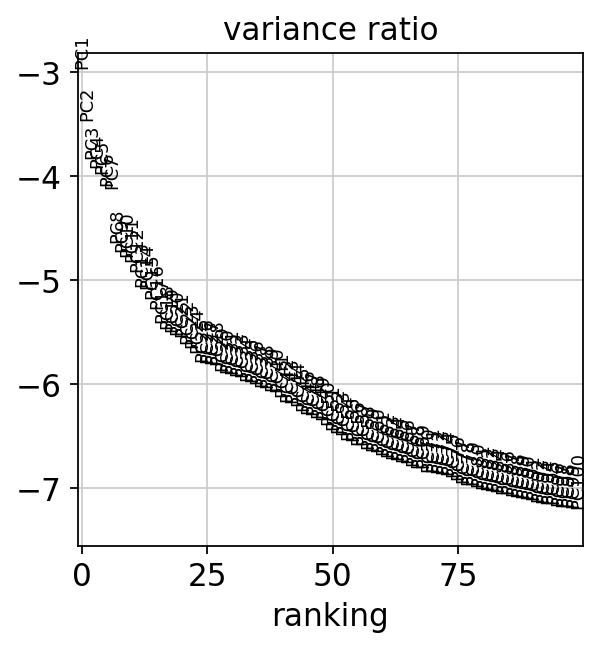

In [13]:
## PCA
sc.tl.pca(adata_mnn, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_mnn, log=True, show=100, n_pcs=100)

In [14]:
#nPC=45
sc.pp.neighbors(adata_mnn, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:20.34) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [15]:
sc.tl.tsne(adata_mnn, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:03:49.44) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


... storing 'CellType' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
saving figure to file ./figures/tsne_Batch_mnn.pdf


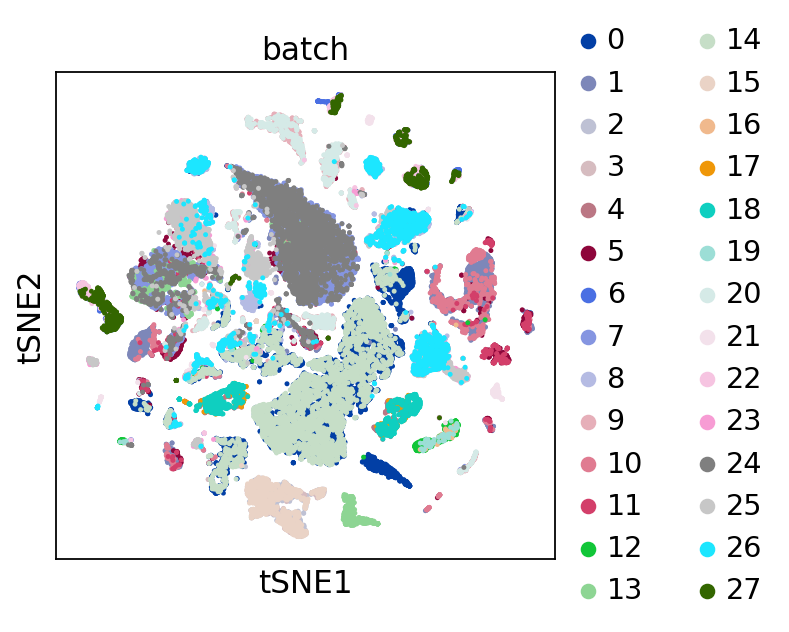

saving figure to file ./figures/tsne_CellType_mnn.pdf


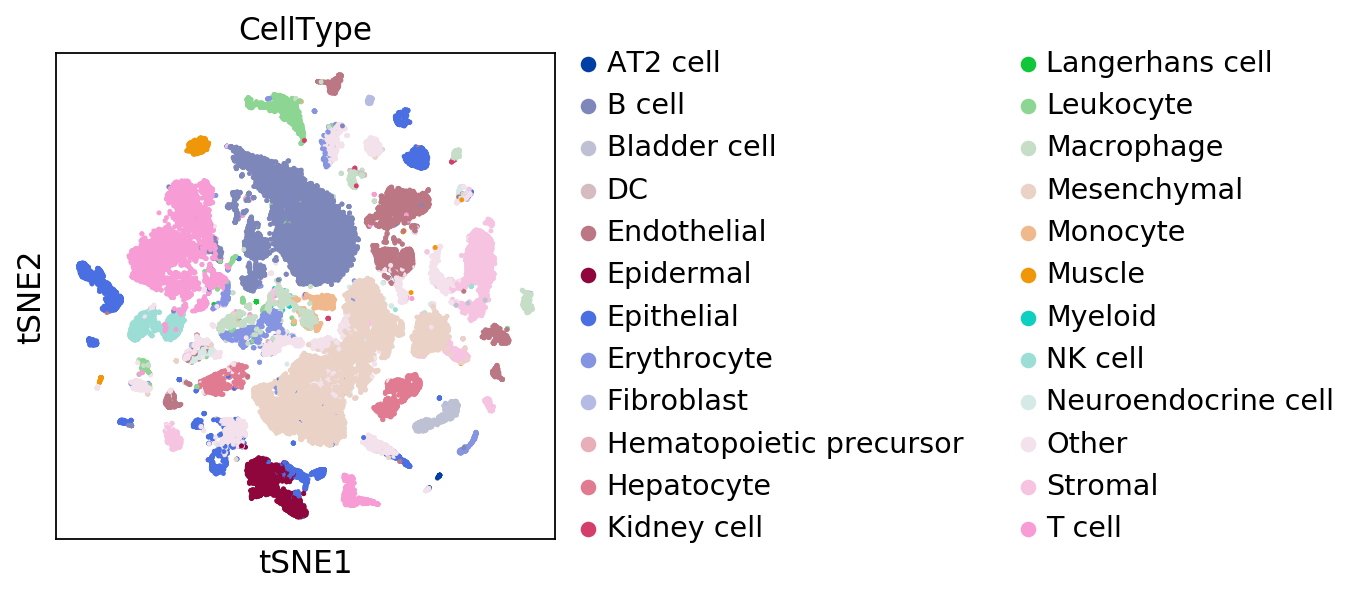

saving figure to file ./figures/tsne_CellType_mnn_ondata.pdf


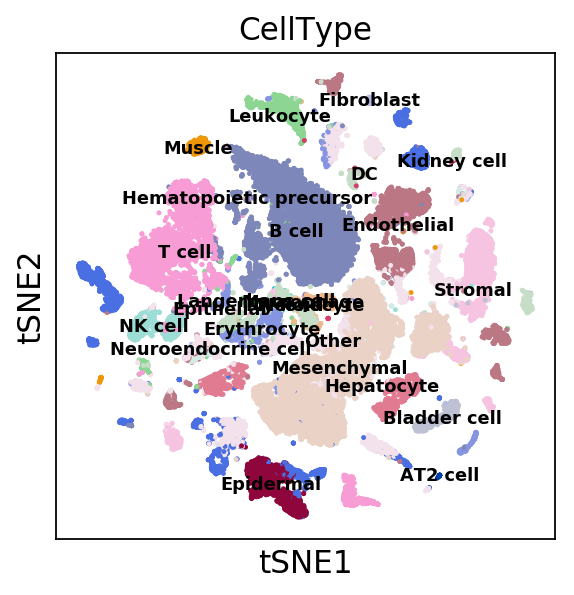

In [16]:
sc.pl.tsne(adata_mnn, color=['batch'], size=20, save="_Batch_mnn.pdf")
sc.pl.tsne(adata_mnn, color=['CellType'], size=20, save="_CellType_mnn.pdf")
sc.pl.tsne(adata_mnn, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_mnn_ondata.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:12.05) --> found 47 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_mnn.pdf


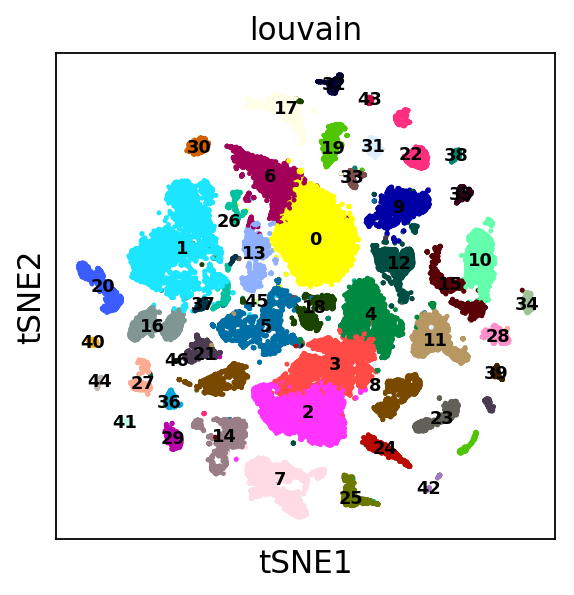

In [17]:
#res=0.6
sc.tl.louvain(adata_mnn, resolution=0.6)
sc.pl.tsne(adata_mnn, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_mnn.pdf')

In [18]:
adata_mnn.obs.to_csv("./cluster_mnn.txt", index=False)

In [3]:
#adata_mnn=sc.read("adata_mnns.h5ad")
#adata_mnn

AnnData object with n_obs × n_vars = 45995 × 2297 
    obs: 'CellID', 'CellType', 'batch', 'cell_ontology_class', 'channel', 'n_counts', 'n_genes', 'percent_mito', 'tissue', 'louvain'

In [19]:
# adata.write("./adata.h5ad")
# adata_base.write("./adata_base.h5ad")
# adata_combat.write("./adata_combat.h5ad")
# adata_reg.write("./adata_reg.h5ad")
# corrected_merged_dge.write("./adata_scanorama.h5ad")
adata_mnn.write("./adata_mnns.h5ad")

ValueError: Unable to create dataset (object header message is too large)

In [80]:
import glob
fnames = glob.glob("adata_*.h5ad")
fnames

['adata_base.h5ad',
 'adata_combat.h5ad',
 'adata_reg.h5ad',
 'adata_mnns.h5ad',
 'adata_scanorama.h5ad']

In [81]:
for fname in fnames:
    adata = sc.read_h5ad(fname)
    df = pd.DataFrame(adata.X)
    df.index = adata.obs.index
    df.columns = adata.var.index
    df.to_csv(fname.split('.')[0]+'.dge.csv')